In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений
from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn
from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.metrics import classification_report, accuracy_score # функция scikit-learn которая считает много метрик классификации

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg

In [ ]:
import matplotlib.colors as clrs
import random
import time

#colors_list = list(clrs._colors_full_map.values())
clr = ['white','orange','green','red','purple','brown','pink','blue','olive','cyan']

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_poly = pd.DataFrame(scores)
    display(DF_poly)
    print('\n')
    print(DF_poly.mean()[2:])

In [ ]:
def feature_importance_plotter(model, features_names):
    feature_importance = model.feature_importances_

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

In [ ]:
uploaded = files.upload()

Saving SF_Mandarin_dataset_context.csv to SF_Mandarin_dataset_context (1).csv


# Старт

In [ ]:
df = pd.read_csv('/content/SF_Mandarin_dataset_ver3.csv', delimiter = ';')
dfc = pd.read_csv('/content/SF_Mandarin_dataset_context.csv', delimiter = ';')

In [ ]:
dfc.loc[dfc['Комментарий'] != 'Исключен из расчета']

,Данные заемщика,Параметр,Комментарий
0,Идентификатор заявки,SkillFactory_Id,NaN
1,Дата рождения,BirthDate,NaN
5,Образование,education,NaN
6,Тип занятости,employment status,NaN
7,Стаж работы,Value,NaN
8,Дата начала работы,JobStartDate,NaN
10,Должность,Position,NaN
13,Ежемесячный доход,MonthProfit,NaN
14,Ежемесячный расход,MonthExpense,NaN
15,Пол,Gender,"Значения: 0 = М, 1 = Ж"


In [ ]:
dfc.loc[dfc['Комментарий'] != 'Исключен из расчета'].shape

(23, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SkillFactory_Id    6603 non-null   float64
 1   BirthDate          6603 non-null   object 
 2   education          6603 non-null   object 
 3   employment status  6603 non-null   object 
 4   Value              6523 non-null   object 
 5   JobStartDate       6494 non-null   object 
 6   Position           6494 non-null   object 
 7   MonthProfit        6603 non-null   float64
 8   MonthExpense       6603 non-null   float64
 9   Gender             6566 non-null   float64
 10  Family status      6566 non-null   object 
 11  ChildCount         6566 non-null   float64
 12  SNILS              6603 non-null   float64
 13  BankA_decision     6603 non-null   object 
 14  BankB_decision     6603 non-null   object 
 15  BankC_decision     6603 non-null   object 
 16  BankD_decision     6603 

In [ ]:
df.head()

,SkillFactory_Id,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
0,1.0,1988-07-21 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01 00:00:00.0000000,начальник п,180000.0,90000.0,0.0,...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
1,2.0,1998-01-16 00:00:00.0000000,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01 00:00:00.0000000,директор,200000.0,60000.0,0.0,...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
2,3.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
3,4.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
4,5.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture


In [ ]:
print("Число уникальных значений")
for col in df.columns:
  nunique_ = df[col].nunique()
  print(f"{col: <25}: {nunique_}")

Число уникальных значений
SkillFactory_Id          : 6603
BirthDate                : 2628
education                : 10
employment status        : 7
Value                    : 13
JobStartDate             : 288
Position                 : 1131
MonthProfit              : 303
MonthExpense             : 210
Gender                   : 2
Family status            : 5
ChildCount               : 6
SNILS                    : 2
BankA_decision           : 3
BankB_decision           : 3
BankC_decision           : 3
BankD_decision           : 3
BankE_decision           : 3
Merch_code               : 70
Loan_amount              : 197
Loan_term                : 4
Goods_category           : 7


In [ ]:
print("Процент пропусков по столбцам")
for col in df.columns:
  percent = df[col].isna().sum() / df[col].shape[0] * 100
  print(f"{col: <25}: {percent:.2f}%")

Процент пропусков по столбцам
SkillFactory_Id          : 24.85%
BirthDate                : 24.85%
education                : 24.85%
employment status        : 24.85%
Value                    : 25.77%
JobStartDate             : 26.10%
Position                 : 26.10%
MonthProfit              : 24.85%
MonthExpense             : 24.85%
Gender                   : 25.28%
Family status            : 25.28%
ChildCount               : 25.28%
SNILS                    : 24.85%
BankA_decision           : 24.85%
BankB_decision           : 24.85%
BankC_decision           : 24.85%
BankD_decision           : 24.85%
BankE_decision           : 24.85%
Merch_code               : 24.85%
Loan_amount              : 24.85%
Loan_term                : 24.85%
Goods_category           : 24.85%


In [ ]:
for col in df.columns:
  start = df.index[df[col].isna() == True].tolist()[0]
  length = len(df.index[df[col].isna() == True].tolist())
  print(f"{col: <20}: {start: <10}: {length}")

SkillFactory_Id     : 6603      : 2184
BirthDate           : 6603      : 2184
education           : 6603      : 2184
employment status   : 6603      : 2184
Value               : 135       : 2264
JobStartDate        : 135       : 2293
Position            : 135       : 2293
MonthProfit         : 6603      : 2184
MonthExpense        : 6603      : 2184
Gender              : 355       : 2221
Family status       : 355       : 2221
ChildCount          : 355       : 2221
SNILS               : 6603      : 2184
BankA_decision      : 6603      : 2184
BankB_decision      : 6603      : 2184
BankC_decision      : 6603      : 2184
BankD_decision      : 6603      : 2184
BankE_decision      : 6603      : 2184
Merch_code          : 6603      : 2184
Loan_amount         : 6603      : 2184
Loan_term           : 6603      : 2184
Goods_category      : 6603      : 2184


In [ ]:
df.shape[0] - 2184

6603

In [ ]:
df = df.dropna(subset=['SkillFactory_Id'])

In [ ]:
df.drop(columns = ['SkillFactory_Id'], inplace = True)

<ipython-input-16-daa7597dcf63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['SkillFactory_Id'], inplace = True)


# Визуализация и EDA

## BirthDate (num)

In [ ]:
df['BirthDate']

0       1988-07-21 00:00:00.0000000
1       1998-01-16 00:00:00.0000000
2       1972-10-02 00:00:00.0000000
3       1972-10-02 00:00:00.0000000
4       1972-10-02 00:00:00.0000000
                   ...             
6598    1975-09-07 00:00:00.0000000
6599    1985-04-20 00:00:00.0000000
6600    1987-12-19 00:00:00.0000000
6601    2003-10-05 00:00:00.0000000
6602    2003-10-05 00:00:00.0000000
Name: BirthDate, Length: 6603, dtype: object

In [ ]:
df.BirthDate = pd.to_datetime(df.BirthDate)
pd.DataFrame(df.BirthDate.dt.year.sort_values()).describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
BirthDate,6603.0,1986.68,12.43,1940.0,1979.0,1988.0,1998.0,2005.0


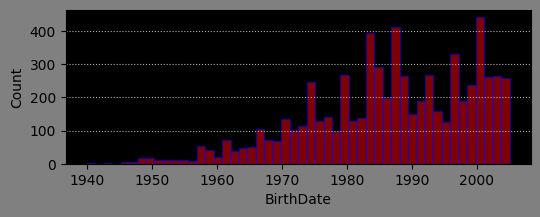

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))

pd.DataFrame(df.BirthDate.dt.year.sort_values()).hist(ax=ax,
                                                      color='r',
                                                      edgecolor='b',
                                                      bins=50,
                                                      alpha=0.5)
fig.set(facecolor='gray')

ax.set(facecolor='black',
       xlabel='BirthDate',
       ylabel='Count',
       title='')

ax.yaxis.grid(True, linestyle=':')
ax.xaxis.grid(False)

plt.show()

In [ ]:
df.BirthDate = df.BirthDate.dt.year # замена на число

In [ ]:
df.BirthDate

0       1988
1       1998
2       1972
3       1972
4       1972
        ... 
6598    1975
6599    1985
6600    1987
6601    2003
6602    2003
Name: BirthDate, Length: 6603, dtype: int64

In [ ]:
df['age'] = (2023 - df['BirthDate'])
df['age']

0       35
1       25
2       51
3       51
4       51
        ..
6598    48
6599    38
6600    36
6601    20
6602    20
Name: age, Length: 6603, dtype: int64

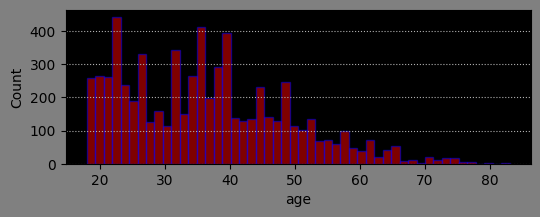

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))

pd.DataFrame(df.age.sort_values()).hist(ax=ax,
                                        color='r',
                                        edgecolor='b',
                                        bins=50,
                                        alpha=0.5)
fig.set(facecolor='gray')

ax.set(facecolor='black',
       xlabel='age',
       ylabel='Count',
       title='')

ax.yaxis.grid(True, linestyle=':')
ax.xaxis.grid(False)

plt.show()

## Education (2 cat)

In [ ]:
# есть или нет вышка
df['education'].value_counts()

Высшее - специалист         5296
Среднее профессиональное     471
Среднее                      233
Неоконченное высшее          233
Бакалавр                     153
Несколько высших             110
Магистр                       73
Неоконченное среднее          30
MBA                            3
Ученая степень                 1
Name: education, dtype: int64

In [ ]:
df = df.drop(df.loc[(df['education'] == 'MBA') | (df['education'] == 'Ученая степень')].index.tolist())

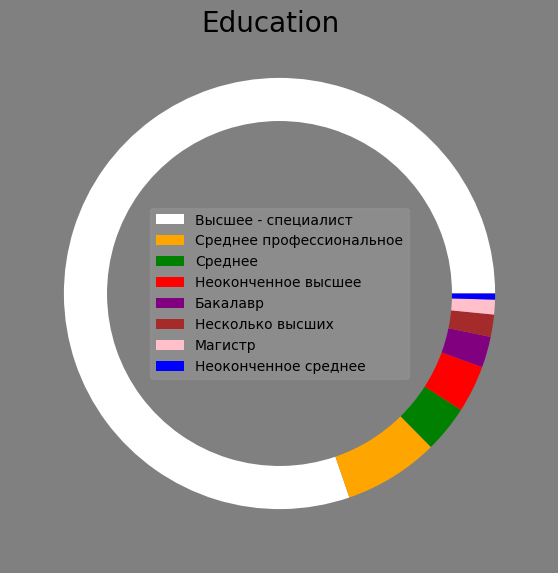

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

exp=(0.1,0.2,0.1,0.2,0.1,0.2,0.1,0.2)

ax.pie(df['education'].value_counts(),
       colors=np.array(clr)[0:8],
       wedgeprops=dict(width=0.2))

ax.legend(df['education'].value_counts().index,
          loc="center",
          framealpha=0.1)

fig.set(facecolor='gray')
fig.suptitle('Education', fontsize=20, y=0.9)

plt.show()

In [ ]:
df['education'].value_counts()

Высшее - специалист         5296
Среднее профессиональное     471
Среднее                      233
Неоконченное высшее          233
Бакалавр                     153
Несколько высших             110
Магистр                       73
Неоконченное среднее          30
Name: education, dtype: int64

In [ ]:
df['education'] = df['education'].replace('Неоконченное среднее', 'Среднее')
df['education'] = df['education'].replace('Неоконченное высшее', 'Среднее')
df['education'] = df['education'].replace('Среднее профессиональное', 'Среднее')
df['education'] = df['education'].replace('Магистр', 'Высшее - специалист')
df['education'] = df['education'].replace('Несколько высших', 'Высшее - специалист')
df['education'] = df['education'].replace('Бакалавр', 'Высшее - специалист')
df['education'].value_counts()

Высшее - специалист    5632
Среднее                 967
Name: education, dtype: int64

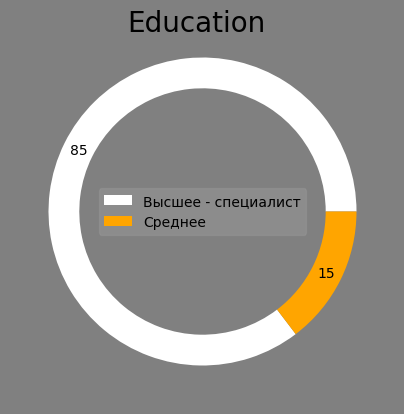

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(df['education'].value_counts(),
       colors=(clr[0],clr[1]),
       autopct='%.f',
       pctdistance=0.9,
       wedgeprops=dict(width=0.2))

ax.legend(df['education'].value_counts().index,
          loc="center",
          framealpha=0.1)

fig.set(facecolor='gray')
fig.suptitle('Education', fontsize=20, y=0.9)

plt.show()

In [ ]:
df['education'] = df['education'].replace('Высшее - специалист', 1)
df['education'] = df['education'].replace('Среднее', 0)
df['education'].value_counts()

1    5632
0     967
Name: education, dtype: int64

## Employment status (3 cat)

In [ ]:
df['employment status'].value_counts()

Работаю по найму полный рабочий день/служу    4856
Собственное дело                              1525
Не работаю                                      75
Работаю по найму неполный рабочий день          62
Студент                                         44
Декретный отпуск                                19
Пенсионер                                       18
Name: employment status, dtype: int64

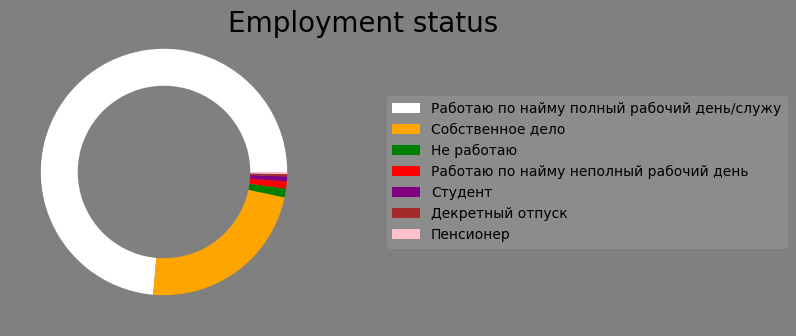

In [ ]:
fig = plt.figure(figsize=(10, 4))

ax_A = plt.subplot(1, 2, 1)
ax_A.pie(df['employment status'].value_counts(),
       colors=np.array(clr)[0:7],
       wedgeprops=dict(width=0.3))

ax_O = plt.subplot(1, 2, 2)
ax_O.pie(df['employment status'].value_counts(),
         colors=np.array(clr)[0:7],
         wedgeprops=dict(width=0.00001))

ax_O.legend(df['employment status'].value_counts().index,
            loc="center",
            framealpha=0.1)

fig.suptitle('Employment status', fontsize=20, y=0.9)
fig.set(facecolor='gray')
plt.show()

In [ ]:
df['employment status'].value_counts()

Работаю по найму полный рабочий день/служу    4856
Собственное дело                              1525
Не работаю                                      75
Работаю по найму неполный рабочий день          62
Студент                                         44
Декретный отпуск                                19
Пенсионер                                       18
Name: employment status, dtype: int64

In [ ]:
df['employment status'] = df['employment status'].replace('Пенсионер', 'Rare')
df['employment status'] = df['employment status'].replace('Декретный отпуск', 'Rare')
df['employment status'] = df['employment status'].replace('Студент', 'Rare')
df['employment status'] = df['employment status'].replace('Работаю по найму неполный рабочий день', 'Rare')
df['employment status'] = df['employment status'].replace('Не работаю', 'Rare')
df['employment status'].value_counts()

Работаю по найму полный рабочий день/служу    4856
Собственное дело                              1525
Rare                                           218
Name: employment status, dtype: int64

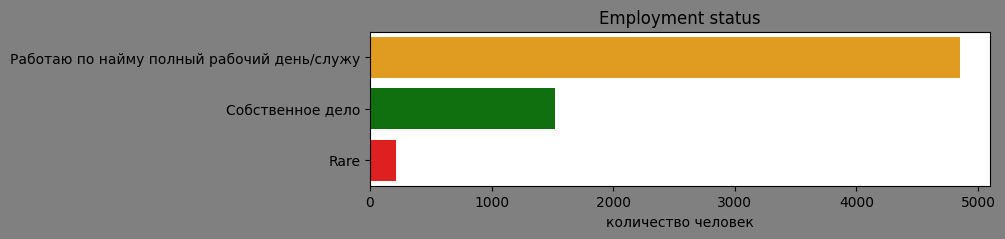

In [ ]:
data = df['employment status'].value_counts().reset_index()

plt.figure(figsize=(8,2),
           facecolor='gray')

sns.barplot(data=data,
            y="index",
            x="employment status",
            palette=np.array(clr)[1:6])
plt.xlabel("количество человек")
plt.ylabel("")
plt.title("Employment status")

plt.show()

In [ ]:
df['employment status'] = df['employment status'].replace('Rare', 0)
df['employment status'] = df['employment status'].replace('Работаю по найму полный рабочий день/служу', 1)
df['employment status'] = df['employment status'].replace('Собственное дело', 2)
df['employment status'].value_counts()

1    4856
2    1525
0     218
Name: employment status, dtype: int64

## Value (num)

In [ ]:
df['Value'].value_counts()

10 и более лет       3615
3 - 4 года            528
2 - 3 года            503
4 - 5 лет             371
5 - 6 лет             292
1 - 2 года            278
6 - 7 лет             250
7 - 8 лет             225
8 - 9 лет             152
6 месяцев - 1 год     127
9 - 10 лет             87
4 - 6 месяцев          55
менее 4 месяцев        36
Name: Value, dtype: int64

In [ ]:
df['Value'].value_counts().reset_index()

,index,Value
0,10 и более лет,3615
1,3 - 4 года,528
2,2 - 3 года,503
3,4 - 5 лет,371
4,5 - 6 лет,292
5,1 - 2 года,278
6,6 - 7 лет,250
7,7 - 8 лет,225
8,8 - 9 лет,152
9,6 месяцев - 1 год,127


In [ ]:
df[df['Value'].isna() == True].shape

(80, 22)

In [ ]:
df[(df['JobStartDate'].isna() == True) & (df['Value'].isna() == True)].shape

(80, 22)

In [ ]:
df[df['Value'].isna() == True].MonthProfit.value_counts() #сделал вывод, что эти нелюди работают и зарабатывают

40000.0     9
50000.0     5
121000.0    5
30000.0     5
100000.0    5
80000.0     5
60000.0     4
300000.0    3
600000.0    3
15000.0     3
120000.0    3
70000.0     3
10000.0     3
25000.0     2
5500.0      2
8000.0      2
90000.0     2
46000.0     2
157649.0    2
75500.0     1
85000.0     1
23000.0     1
400000.0    1
45000.0     1
55000.0     1
95000.0     1
57900.0     1
18000.0     1
75000.0     1
11400.0     1
26400.0     1
Name: MonthProfit, dtype: int64

In [ ]:
pd.DataFrame(df[(df['Value'].isna())].BirthDate.sort_values()).describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
BirthDate,80.0,1993.55,12.55,1964.0,1984.0,2000.0,2004.0,2005.0


In [ ]:
df['Value'] = df['Value'].fillna(4)

In [ ]:
df['Value'] = df['Value'].replace('10 и более лет', 11)
df['Value'] = df['Value'].replace('3 - 4 года', 4)
df['Value'] = df['Value'].replace('2 - 3 года', 3)
df['Value'] = df['Value'].replace('4 - 5 лет', 5)
df['Value'] = df['Value'].replace('5 - 6 лет', 6)
df['Value'] = df['Value'].replace('1 - 2 года', 2)
df['Value'] = df['Value'].replace('6 - 7 лет', 7)
df['Value'] = df['Value'].replace('7 - 8 лет', 8)
df['Value'] = df['Value'].replace('8 - 9 лет', 9)
df['Value'] = df['Value'].replace('9 - 10 лет', 10)
df['Value'] = df['Value'].replace('4 - 6 месяцев', 0)
df['Value'] = df['Value'].replace('менее 4 месяцев', 0)
df['Value'] = df['Value'].replace('6 месяцев - 1 год', 1)

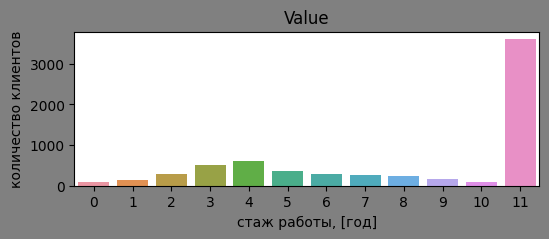

In [ ]:
data = df['Value'].value_counts().reset_index()

plt.figure(figsize=(6,2),
           facecolor='gray')

sns.barplot(data=data, x="index", y="Value")
plt.xlabel("стаж работы, [год]")
plt.ylabel("количество клиентов")
plt.title("Value")
plt.show()

In [ ]:
df.Value = df.Value.astype(int)

## JobStartDate (-)

In [ ]:
df['JobStartDate']

0       2013-09-01 00:00:00.0000000
1       2022-12-01 00:00:00.0000000
2       2005-12-01 00:00:00.0000000
3       2005-12-01 00:00:00.0000000
4       2005-12-01 00:00:00.0000000
                   ...             
6598    2010-06-01 00:00:00.0000000
6599    2020-01-01 00:00:00.0000000
6600    2021-11-01 00:00:00.0000000
6601    2022-08-01 00:00:00.0000000
6602    2022-08-01 00:00:00.0000000
Name: JobStartDate, Length: 6599, dtype: object

In [ ]:
df.JobStartDate = pd.to_datetime(df.JobStartDate)
pd.DataFrame(df.JobStartDate.dt.year.sort_values()).describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
JobStartDate,6490.0,2015.34,7.58,1973.0,2012.0,2018.0,2021.0,2023.0


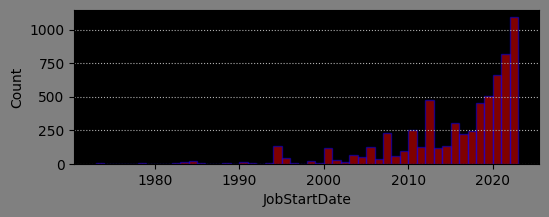

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))

pd.DataFrame(df.JobStartDate.dt.year.sort_values()).hist(ax=ax,
                                                      color='r',
                                                      edgecolor='b',
                                                      bins=50,
                                                      alpha=0.5)
fig.set(facecolor='gray')

ax.set(facecolor='black',
       xlabel='JobStartDate',
       ylabel='Count',
       title='')

ax.yaxis.grid(True, linestyle=':')
ax.xaxis.grid(False)

plt.show()

In [ ]:
pd.DataFrame(df.BirthDate.sort_values()).describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
BirthDate,6599.0,1986.68,12.43,1940.0,1979.0,1988.0,1998.0,2005.0


In [ ]:
# решил просто удалить столбец JobStartDate, потому что предположительно должна быть корреляция JobStartDate i Value
df.drop(columns = ['JobStartDate'], inplace = True)

## Position (cat)

In [ ]:
df['Position'] = df['Position'].str.lower().str.strip()

In [ ]:
pd.DataFrame(df['Position'].value_counts())

,Position
менеджер,426
самозанятая,355
индивидуальный предприниматель,296
руководитель,230
директор,226
...,...
эмолировщик,1
координатор,1
помошник машиниста,1
элек,1


In [ ]:
df['Position'] = df['Position'].replace('инд', 'индивидуальный предприниматель')
df['Position'] = df['Position'].replace('ип', 'индивидуальный предприниматель')

df['Position'] = df['Position'].replace('админи', 'администратор')
df['Position'] = df['Position'].replace('адм', 'администратор')

df['Position'] = df['Position'].replace('самозанятая', 'самозанятый')
df['Position'] = df['Position'].replace('препо', 'преподаватель')
df['Position'] = df['Position'].replace('бух', 'бухгалтер')
df['Position'] = df['Position'].replace('инж', 'инженер')

df['Position'] = df['Position'].replace('начальник участка', 'руководитель')
df['Position'] = df['Position'].replace('начальник отдела', 'руководитель')
df['Position'] = df['Position'].replace('руководитель отдела продаж', 'руководитель')
df['Position'] = df['Position'].replace('руководитель отдела', 'руководитель')
df['Position'] = df['Position'].replace('руководитель колл-центра', 'руководитель')
df['Position'] = df['Position'].replace('рук', 'руководитель')
df['Position'] = df['Position'].replace('руко', 'руководитель')
df['Position'] = df['Position'].replace('руков', 'руководитель')

df['Position'] = df['Position'].replace('зам', 'заместитель директора')
df['Position'] = df['Position'].replace('гене', 'генеральный директор')
df['Position'] = df['Position'].replace('директор филиала/ департамента', 'директор')
df['Position'] = df['Position'].replace('директор магазина', 'директор')

df['Position'] = df['Position'].replace('старший спец', 'специалист')
df['Position'] = df['Position'].replace('спец', 'специалист')
df['Position'] = df['Position'].replace('главный специалист', 'специалист')
df['Position'] = df['Position'].replace('ведущий специалист', 'специалист')
df['Position'] = df['Position'].replace('старший специалист', 'специалист')

df['Position'] = df['Position'].replace('менеджер по работе с маркетплейсами', 'менеджер')
df['Position'] = df['Position'].replace('менеджер по закупкам', 'менеджер')
df['Position'] = df['Position'].replace('менед', 'менеджер')
df['Position'] = df['Position'].replace('старший менеджер', 'менеджер')
df['Position'] = df['Position'].replace('ведущий менеджер', 'менеджер')
df['Position'] = df['Position'].replace('главный менеджер', 'менеджер')
df['Position'] = df['Position'].replace('менеджер по продажам', 'менеджер')
df['Position'] = df['Position'].replace('мене', 'менеджер')
df['Position'] = df['Position'].replace('менеджер по закупке', 'менеджер')
df['Position'] = df['Position'].replace('персональный менеджер', 'менеджер')

df['Position'] = df['Position'].replace('старший продавец', 'продавец')
df['Position'] = df['Position'].replace('продавец-кассир', 'продавец')
df['Position'] = df['Position'].replace('консультант', 'продавец')
df['Position'] = df['Position'].replace('специалист по продажам', 'продавец')
df['Position'] = df['Position'].replace('продавец-консультант', 'продавец')

In [ ]:
df['Position'].value_counts()

менеджер                          652
самозанятый                       515
специалист                        476
индивидуальный предприниматель    390
руководитель                      370
                                 ... 
помошник машиниста                  1
элек                                1
художественный руководитель         1
координатор                         1
км                                  1
Name: Position, Length: 792, dtype: int64

In [ ]:
df[(df['Position'].isna() == True)].shape

(109, 21)

In [ ]:
df['Position'].replace(list(df.loc[~df['Position']. isin(df['Position'].value_counts().index[0:50])].Position),
                       'rare',
                       inplace=True)

In [ ]:
df['Position'].value_counts().nunique()

37

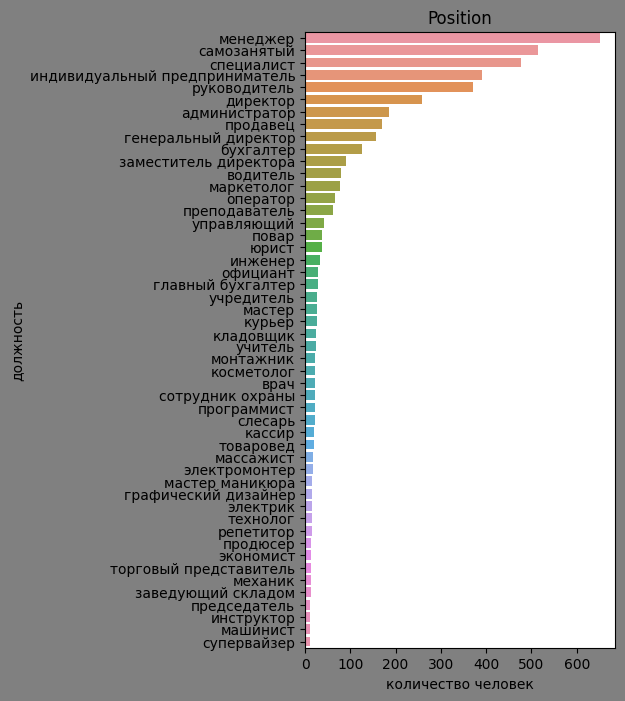

In [ ]:
data = df['Position'].value_counts()[1:].reset_index()

plt.figure(figsize=(4,8),
           facecolor='gray')

sns.barplot(data=data, y="index", x="Position")
plt.xlabel("количество человек")
plt.ylabel("должность")
plt.title("Position")
# plt.xticks(rotation=90)
plt.show()

## MonthProfit (num)

In [ ]:
df['MonthProfit']

0       180000.0
1       200000.0
2       300000.0
3       300000.0
4       300000.0
          ...   
6598    125000.0
6599    150000.0
6600    130000.0
6601    150000.0
6602    150000.0
Name: MonthProfit, Length: 6599, dtype: float64

In [ ]:
df.loc[df['MonthProfit']>320000, ['MonthProfit']] = 320000

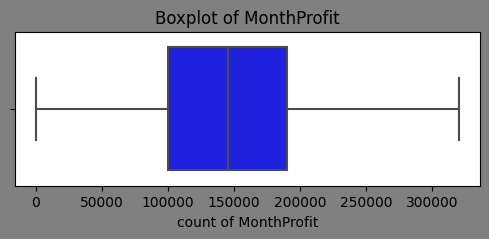

In [ ]:
plt.figure(figsize=(6, 2),
           facecolor='gray')

sns.boxplot(data=df,
            color = 'blue',
            x=df['MonthProfit'])

plt.title('Boxplot of MonthProfit')
plt.xlabel('count of MonthProfit')
plt.show()

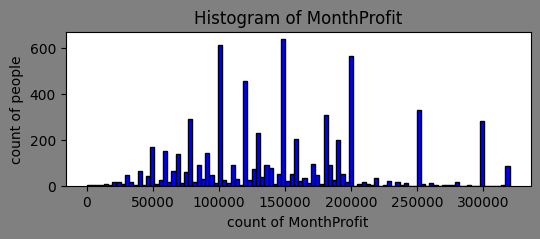

In [ ]:
plt.subplots(figsize=(6, 2),
             facecolor='gray')

plt.hist(df['MonthProfit'],
         color = 'blue',
         edgecolor = 'black',
         bins = 100)

plt.title('Histogram of MonthProfit')
plt.xlabel('count of MonthProfit')
plt.ylabel('count of people')
plt.show()

In [ ]:
df.MonthProfit = df.MonthProfit.astype(int)

## MonthExpense (num)

In [ ]:
df['MonthExpense']

0       90000.0
1       60000.0
2       45000.0
3       45000.0
4       45000.0
         ...   
6598    15000.0
6599    14000.0
6600    30000.0
6601    10000.0
6602    10000.0
Name: MonthExpense, Length: 6599, dtype: float64

In [ ]:
df.loc[df['MonthExpense']>50000, ['MonthExpense']] = 50000

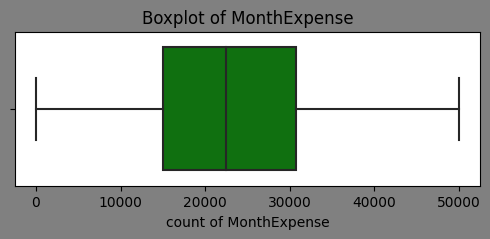

In [ ]:
plt.figure(figsize=(6, 2),
           facecolor='gray')

sns.boxplot(data=df,
            color = 'green',
            x=df['MonthExpense'])

plt.title('Boxplot of MonthExpense')
plt.xlabel('count of MonthExpense')
plt.show()

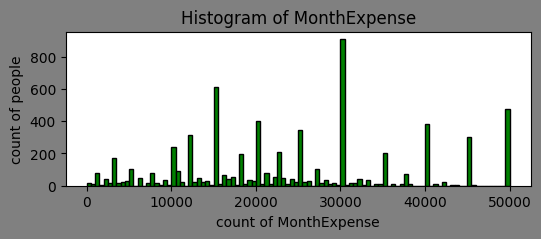

In [ ]:
plt.subplots(figsize=(6, 2),
             facecolor='gray')

plt.hist(df['MonthExpense'],
         color = 'green',
         edgecolor = 'black',
         bins = 100)

plt.title('Histogram of MonthExpense')
plt.xlabel('count of MonthExpense')
plt.ylabel('count of people')
plt.show()

In [ ]:
df.MonthExpense = df.MonthExpense.astype(int)

## Gender (2 cat)

In [ ]:
df.Gender.value_counts()

0.0    4532
1.0    2030
Name: Gender, dtype: int64

In [ ]:
df.Gender.isna().sum()

37

In [ ]:
df.Gender = df.Gender.fillna(0)

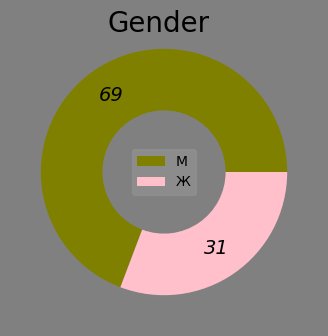

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.pie(df['Gender'].value_counts(),
       colors=(clr[8],clr[6]),
       autopct='%.f',
       pctdistance=0.75,
       wedgeprops=dict(width=0.5),
       textprops={'fontsize': 14, 'fontstyle':'italic'})

ax.legend(loc="center",
          framealpha=0.1,
          labels=('М','Ж'))

fig.set(facecolor='gray')
fig.suptitle('Gender', fontsize=20, y=0.9)

plt.show()

In [ ]:
df.Gender = df.Gender.astype(object)

In [ ]:
df['Gender'] = df['Gender'].replace('М', 1)
df['Gender'] = df['Gender'].replace('Ж', 0)
df['Gender'].value_counts()

0.0    4569
1.0    2030
Name: Gender, dtype: int64

In [ ]:
df.Gender = df.Gender.astype(int)

## Family status (4 cat)

In [ ]:
df['Family status'].value_counts()

Никогда в браке не состоял(а)               4436
Женат / замужем                             1489
Разведён / Разведена                         484
Гражданский брак / совместное проживание     104
Вдовец / вдова                                49
Name: Family status, dtype: int64

In [ ]:
df['Family status'].isna().sum()

37

In [ ]:
df['Family status'].fillna('Никогда в браке не состоял(а)', inplace=True)

In [ ]:
df['Family status'] = df['Family status'].replace('Вдовец / вдова', 'Разведён / Разведена')
df['Family status'].value_counts()

Никогда в браке не состоял(а)               4473
Женат / замужем                             1489
Разведён / Разведена                         533
Гражданский брак / совместное проживание     104
Name: Family status, dtype: int64

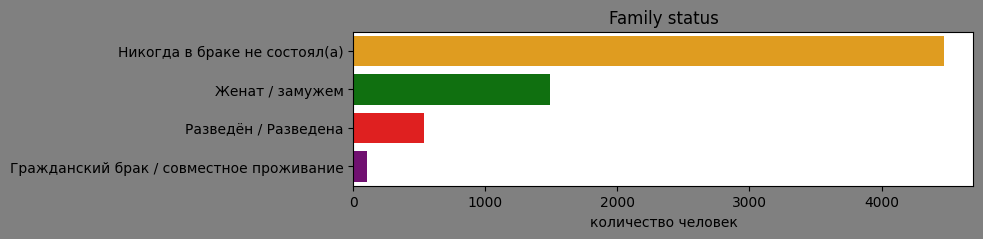

In [ ]:
data = df['Family status'].value_counts().reset_index()

plt.figure(figsize=(8,2),
           facecolor='gray')

sns.barplot(data=data,
            y="index",
            x="Family status",
            palette=np.array(clr)[1:5])
plt.xlabel("количество человек")
plt.ylabel("")
plt.title("Family status")

plt.show()

## ChildCount (num)

In [ ]:
df['ChildCount'].value_counts()

0.0    6166
1.0     202
2.0     154
3.0      33
4.0       6
5.0       1
Name: ChildCount, dtype: int64

In [ ]:
df['ChildCount'].isna().sum()

37

In [ ]:
df['ChildCount'] = df['ChildCount'].replace(5, 3)
df['ChildCount'] = df['ChildCount'].replace(4, 3)
df['ChildCount'].fillna(0, inplace=True)
df['ChildCount'].value_counts()

0.0    6203
1.0     202
2.0     154
3.0      40
Name: ChildCount, dtype: int64

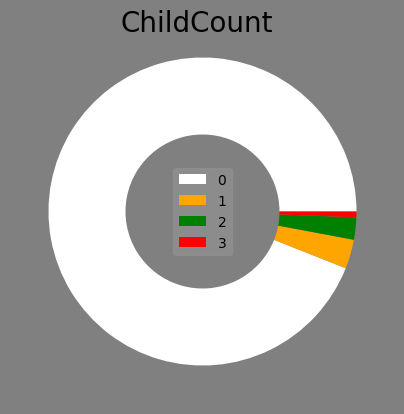

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(df['ChildCount'].value_counts(),
       colors=np.array(clr)[0:5],
       wedgeprops=dict(width=0.5))

ax.legend(loc="center",
          framealpha=0.1,
          labels=(0,1,2,3))

fig.set(facecolor='gray')
fig.suptitle('ChildCount', fontsize=20, y=0.9)

plt.show()

In [ ]:
df.ChildCount = df.ChildCount.astype(int)

## SNILS (2 cat)

In [ ]:
df['SNILS'].value_counts()

0.0    4289
1.0    2310
Name: SNILS, dtype: int64

In [ ]:
df['SNILS'].isna().sum()

0

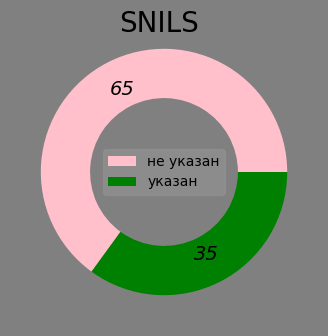

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.pie(df['SNILS'].value_counts(),
       colors=(clr[6],'green'),
       autopct='%.f',
       pctdistance=0.75,
       wedgeprops=dict(width=0.4),
       textprops={'fontsize': 14, 'fontstyle':'italic'})

ax.legend(loc="center",
          framealpha=0.1,
          labels=('не указан','указан'))

fig.set(facecolor='gray')
fig.suptitle('SNILS', fontsize=20, y=0.9)

plt.show()

In [ ]:
df.SNILS = df.SNILS.astype(object)

In [ ]:
df.SNILS = df.SNILS.astype(int)

## Merch_code (-)

In [ ]:
df['Merch_code'].value_counts()

35.0    110
11.0    110
74.0    108
62.0    108
63.0    106
       ... 
19.0     84
6.0      82
36.0     82
72.0     79
66.0     79
Name: Merch_code, Length: 70, dtype: int64

In [ ]:
df['Merch_code'].isna().sum()

0

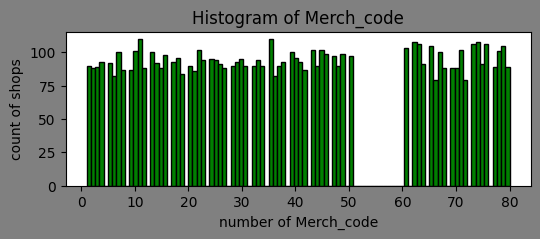

In [ ]:
plt.subplots(figsize=(6, 2),
             facecolor='gray')

plt.hist(df['Merch_code'],
         color = 'green',
         edgecolor = 'black',
         bins = 100)

plt.title('Histogram of Merch_code')
plt.xlabel('number of Merch_code')
plt.ylabel('count of shops')
plt.show()

In [ ]:
df.Merch_code = df.Merch_code.astype(int)

In [ ]:
# решил просто удалить столбец Merch_code, потому что просто не разбираюсь в этом столбце данных (числовой или категориальный...)
df.drop(columns = ['Merch_code'], inplace = True)

## Loan_amount (num)

In [ ]:
df['Loan_amount'].isna().sum()

0

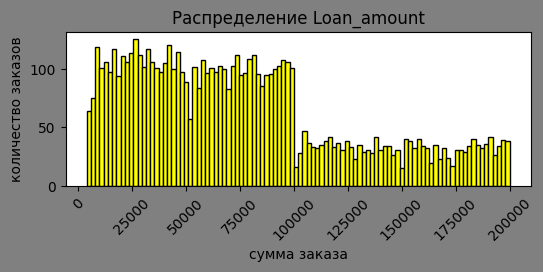

In [ ]:
plt.subplots(figsize=(6, 2),
             facecolor='gray')

plt.hist(df['Loan_amount'],
         color = 'yellow',
         edgecolor = 'black',
         bins = 100)

plt.title('Распределение Loan_amount')
plt.xlabel('сумма заказа')
plt.ylabel('количество заказов')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.Loan_amount = df.Loan_amount.astype(int)

## Loan_term (num)

In [ ]:
df['Loan_term'].isna().sum()

0

In [ ]:
df['Loan_term'].value_counts()

12.0    2486
6.0     2406
18.0     879
24.0     828
Name: Loan_term, dtype: int64

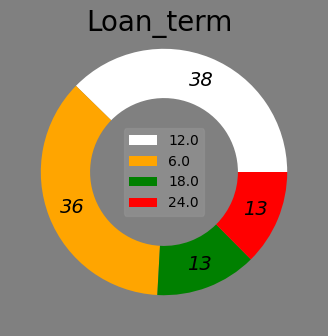

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.pie(df['Loan_term'].value_counts(),
       colors=np.array(clr)[0:4],
       autopct='%.f',
       pctdistance=0.8,
       wedgeprops=dict(width=0.4),
       textprops={'fontsize': 14, 'fontstyle':'italic'})

ax.legend(df['Loan_term'].value_counts().index,
          loc="center",
          framealpha=0.1)

fig.set(facecolor='gray')
fig.suptitle('Loan_term', fontsize=20, y=0.9)

plt.show()

In [ ]:
df.Loan_term = df.Loan_term.astype(int)

## Goods_category (cat)

In [ ]:
df['Goods_category'].value_counts()

Furniture           976
Travel              956
Mobile_devices      956
Medical_services    939
Education           935
Fitness             928
Other               909
Name: Goods_category, dtype: int64

In [ ]:
df['Goods_category'].isna().sum()

0

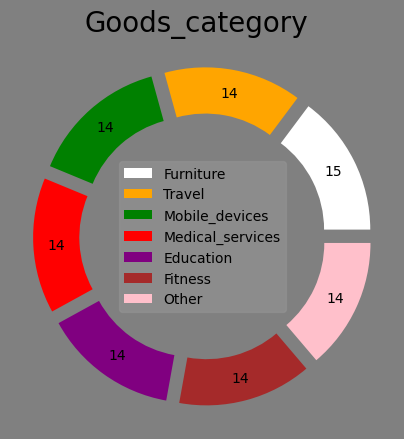

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

exp=(0.1,0.1,0.1,0.1,0.1,0.1,0.1)

ax.pie(df['Goods_category'].value_counts(),
       colors=np.array(clr)[0:7],
       autopct='%.f',
       explode=exp,
       pctdistance=0.85,
       wedgeprops=dict(width=0.3))

ax.legend(df['Goods_category'].value_counts().index,
          loc="center",
          framealpha=0.1)

fig.set(facecolor='gray')
fig.suptitle('Goods_category', fontsize=20, y=0.95)

plt.show()

## Bank_decision

In [ ]:
print(df['BankA_decision'].value_counts())
print(df['BankB_decision'].value_counts())
print(df['BankC_decision'].value_counts())
print(df['BankD_decision'].value_counts())
print(df['BankE_decision'].value_counts())

success    4967
denied     1561
error        71
Name: BankA_decision, dtype: int64
success    4891
denied     1633
error        75
Name: BankB_decision, dtype: int64
success    4930
denied     1607
error        62
Name: BankC_decision, dtype: int64
success    4950
denied     1572
error        77
Name: BankD_decision, dtype: int64
success    4946
denied     1581
error        72
Name: BankE_decision, dtype: int64


In [ ]:
print(df['BankA_decision'].isna().sum())
print(df['BankB_decision'].isna().sum())
print(df['BankC_decision'].isna().sum())
print(df['BankD_decision'].isna().sum())
print(df['BankE_decision'].isna().sum())

0
0
0
0
0


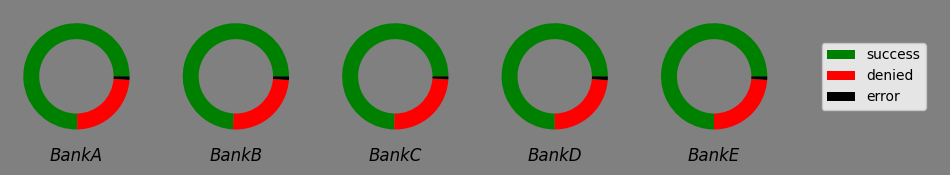

In [ ]:
fig = plt.figure(figsize=(12, 4))

ax_A = plt.subplot(1, 6, 1)
ax_A.pie(df['BankA_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_A.set_title('BankA', fontstyle='italic', y=-0.2)

ax_B = plt.subplot(1, 6, 2)
ax_B.pie(df['BankB_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_B.set_title('BankB', fontstyle='italic', y=-0.2)

ax_C = plt.subplot(1, 6, 3)
ax_C.pie(df['BankC_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_C.set_title('BankC', fontstyle='italic', y=-0.2)

ax_D = plt.subplot(1, 6, 4)
ax_D.pie(df['BankD_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_D.set_title('BankD', fontstyle='italic', y=-0.2)

ax_E = plt.subplot(1, 6, 5)
ax_E.pie(df['BankE_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_E.set_title('BankE', fontstyle='italic', y=-0.2)

ax_O = plt.subplot(1, 6, 6)
ax_O.pie(df['BankE_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.00001))

ax_O.legend(df['BankA_decision'].value_counts().index)

#fig.suptitle("Banks decision", y=0.75, fontsize=20)
fig.set(facecolor='gray')
plt.show()

In [ ]:
df.BankA_decision.replace('error', 'success', inplace = True)
df.BankA_decision.replace('success', 1, inplace = True)
df.BankA_decision.replace('denied', 0, inplace = True)

df.BankB_decision.replace('error', 'success', inplace = True)
df.BankB_decision.replace('success', 1, inplace = True)
df.BankB_decision.replace('denied', 0, inplace = True)

df.BankC_decision.replace('error', 'success', inplace = True)
df.BankC_decision.replace('success', 1, inplace = True)
df.BankC_decision.replace('denied', 0, inplace = True)

df.BankD_decision.replace('error', 'success', inplace = True)
df.BankD_decision.replace('success', 1, inplace = True)
df.BankD_decision.replace('denied', 0, inplace = True)

df.BankE_decision.replace('error', 'success', inplace = True)
df.BankE_decision.replace('success', 1, inplace = True)
df.BankE_decision.replace('denied', 0, inplace = True)

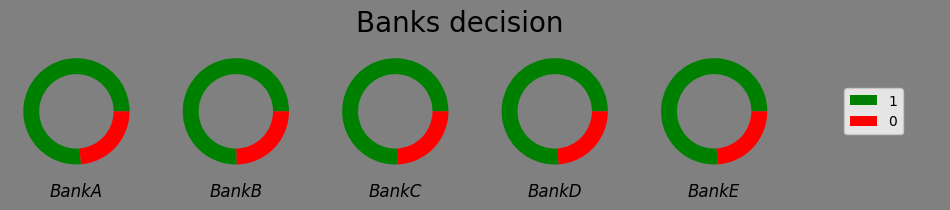

In [ ]:
fig = plt.figure(figsize=(12, 4))

ax_A = plt.subplot(1, 6, 1)
ax_A.pie(df['BankA_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_A.set_title('BankA', fontstyle='italic', y=-0.2)

ax_B = plt.subplot(1, 6, 2)
ax_B.pie(df['BankB_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_B.set_title('BankB', fontstyle='italic', y=-0.2)

ax_C = plt.subplot(1, 6, 3)
ax_C.pie(df['BankC_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_C.set_title('BankC', fontstyle='italic', y=-0.2)

ax_D = plt.subplot(1, 6, 4)
ax_D.pie(df['BankD_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_D.set_title('BankD', fontstyle='italic', y=-0.2)

ax_E = plt.subplot(1, 6, 5)
ax_E.pie(df['BankE_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.3))
ax_E.set_title('BankE', fontstyle='italic', y=-0.2)

ax_O = plt.subplot(1, 6, 6)
ax_O.pie(df['BankE_decision'].value_counts(),
       colors=('green','red','black'),
       wedgeprops=dict(width=0.00001))

ax_O.legend(df['BankA_decision'].value_counts().index)

fig.suptitle("Banks decision", y=0.75, fontsize=20)
fig.set(facecolor='gray')
plt.show()

In [ ]:
df.BankA_decision = df.BankA_decision.astype(int)
df.BankB_decision = df.BankB_decision.astype(int)
df.BankC_decision = df.BankC_decision.astype(int)
df.BankD_decision = df.BankD_decision.astype(int)
df.BankE_decision = df.BankE_decision.astype(int)

# Analysis

## Корреляция и scatterplot

In [ ]:
df.drop_duplicates()
df.reset_index(drop= True , inplace= True)

In [ ]:
df['position'] = df['Position']
df['goods_category'] = df['Goods_category']
df['family status'] = df['Family status']

In [ ]:
df.drop(columns = ['BirthDate'], inplace = True)
df.drop(columns = ['Position'], inplace = True)
df.drop(columns = ['Family status'], inplace = True)
df.drop(columns = ['Goods_category'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   education          6599 non-null   int64 
 1   employment status  6599 non-null   int64 
 2   Value              6599 non-null   int64 
 3   MonthProfit        6599 non-null   int64 
 4   MonthExpense       6599 non-null   int64 
 5   Gender             6599 non-null   int64 
 6   ChildCount         6599 non-null   int64 
 7   SNILS              6599 non-null   int64 
 8   BankA_decision     6599 non-null   int64 
 9   BankB_decision     6599 non-null   int64 
 10  BankC_decision     6599 non-null   int64 
 11  BankD_decision     6599 non-null   int64 
 12  BankE_decision     6599 non-null   int64 
 13  Loan_amount        6599 non-null   int64 
 14  Loan_term          6599 non-null   int64 
 15  age                6599 non-null   int64 
 16  position           6599 non-null   object


In [ ]:
plt.style.use('dark_background')

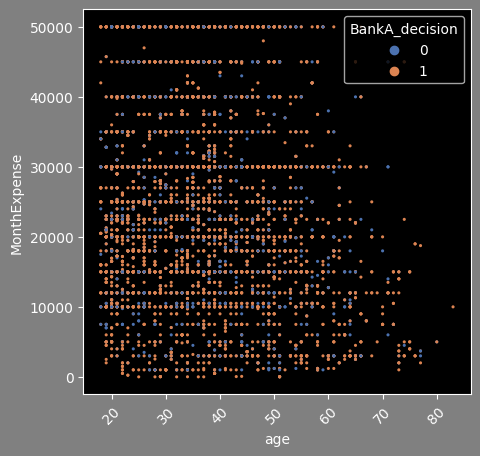

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.scatterplot(
    data=df,
    x="age", y="MonthExpense",
    hue="BankA_decision",
    palette='deep',
    legend=True,
    s=5,
    linewidth=0)
fig.set(facecolor='gray')
plt.xticks(rotation=45)
plt.show()

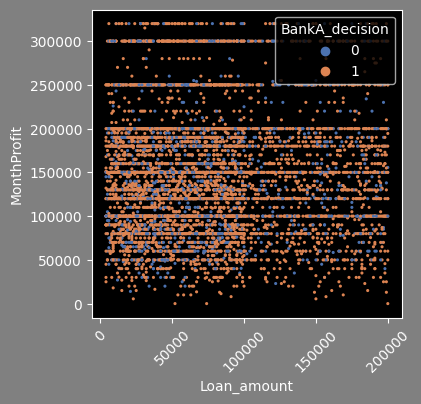

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.scatterplot(
    data=df,
    x="Loan_amount", y="MonthProfit",
    hue="BankA_decision",
    palette='deep',
    legend=True,
    s=5,
    linewidth=0)
fig.set(facecolor='gray')
plt.xticks(rotation=45)
plt.show()

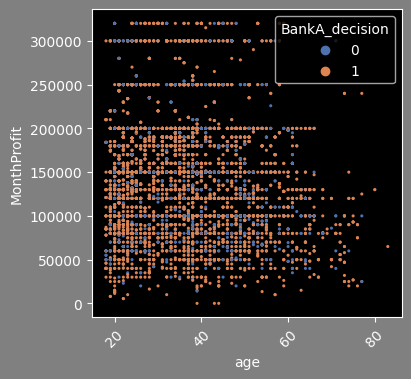

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.scatterplot(
    data=df,
    x="age", y="MonthProfit",
    hue="BankA_decision",
    palette='deep',
    legend=True,
    s=5,
    linewidth=0)
fig.set(facecolor='gray')
plt.xticks(rotation=45)
plt.show()

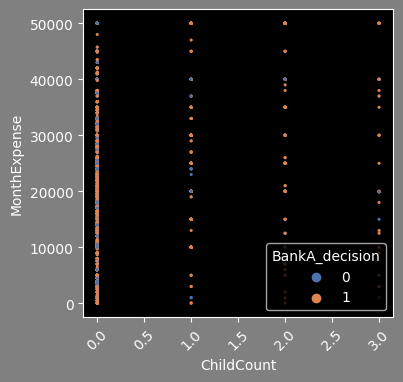

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.scatterplot(
    data=df,
    x="ChildCount", y="MonthExpense",
    hue="BankA_decision",
    palette='deep',
    legend=True,
    s=5,
    linewidth=0)
fig.set(facecolor='gray')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# корреляция
cm = sns.color_palette("rocket_r", as_cmap=True)

(df
.corr()
.style
.format("{:.1f}")
.background_gradient(cmap=cm,       # использовал стиль
                     vmin = -1,     # нижний диапазон
                     vmax=1))       # верхний диапазон

<ipython-input-125-c28fa4cf97ef>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .corr()


,education,employment status,Value,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Loan_amount,Loan_term,age
education,1.0,0.1,0.4,0.2,-0.1,-0.1,-0.2,-0.3,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.2
employment status,0.1,1.0,0.1,0.2,0.1,-0.1,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
Value,0.4,0.1,1.0,0.1,-0.1,-0.0,-0.1,-0.3,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.5
MonthProfit,0.2,0.2,0.1,1.0,0.5,-0.0,-0.2,-0.1,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.1
MonthExpense,-0.1,0.1,-0.1,0.5,1.0,-0.0,0.1,0.2,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.1
Gender,-0.1,-0.1,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.1
ChildCount,-0.2,-0.1,-0.1,-0.2,0.1,0.0,1.0,0.2,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
SNILS,-0.3,-0.0,-0.3,-0.1,0.2,0.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.2
BankA_decision,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
BankB_decision,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0


In [ ]:
# какой-то зависимости в данных решения банка не обнаружил :(

## Test of корреляция (не смотреть)

In [ ]:
data1 = {'Name': [1, 2, 3, 4, 5], 'Age': [1, 2, 3, 4, 5], 'Row': [1, 8, 6, 4, 2], 'Test': [10, 8, 6, 4, 2]}
df1 = pd.DataFrame(data1)

In [ ]:
cm1 = sns.color_palette("rocket_r", as_cmap=True)

(df1
.corr()
.style
.format("{:.3f}")
.background_gradient(cmap=cm1,      # использовал стиль
                     vmin = -1,     # нижний диапазон
                     vmax=1))       # верхний диапазон

,Name,Age,Row,Test
Name,1.000,1.000,-0.110,-1.000
Age,1.000,1.000,-0.110,-1.000
Row,-0.110,-0.110,1.000,0.110
Test,-1.000,-1.000,0.110,1.000


## Pipeline

In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# StandardScaler
# MinMaxScaler

In [ ]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

In [ ]:
X = df.drop(columns = ['BankA_decision',
                       'BankB_decision',
                       'BankC_decision',
                       'BankD_decision',
                       'BankE_decision'])

yA = df["BankA_decision"]
yB = df["BankB_decision"]
yC = df["BankC_decision"]
yD = df["BankD_decision"]
yE = df["BankE_decision"]

features_names = df.drop(columns = ['BankA_decision',
                                    'BankB_decision',
                                    'BankC_decision',
                                    'BankD_decision',
                                    'BankE_decision']).columns

X_train, X_test, yA_train, yA_test = train_test_split(X, yA, test_size=0.2, random_state=40)
X_train, X_test, yB_train, yB_test = train_test_split(X, yB, test_size=0.2, random_state=40)
X_train, X_test, yC_train, yC_test = train_test_split(X, yC, test_size=0.2, random_state=40)
X_train, X_test, yD_train, yD_test = train_test_split(X, yD, test_size=0.2, random_state=40)
X_train, X_test, yE_train, yE_test = train_test_split(X, yE, test_size=0.2, random_state=40)

In [ ]:
cat_columns = []
num_columns = []

for column_name in X.columns:
    if (X[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['position', 'goods_category', 'family status'] 
 len =  3
numerical columns:	  ['education', 'employment status', 'Value', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Loan_amount', 'Loan_term', 'age'] 
 len =  11


In [ ]:
# preprocessors = ColumnTransformer(transformers=[
#     ('num', numerical_pipe, num_columns),
#     ('cat', categorical_pipe, cat_columns)
# ])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns)
])

In [ ]:
X_train

,education,employment status,Value,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Loan_amount,Loan_term,age,position,goods_category,family status
3329,1,1,11,135000,12000,0,0,0,149000,18,38,продюсер,Education,Женат / замужем
659,1,1,11,133000,12000,0,0,0,61000,12,58,специалист,Mobile_devices,Никогда в браке не состоял(а)
5488,1,1,11,150000,35000,0,0,1,69000,12,33,менеджер,Fitness,Женат / замужем
6586,1,1,11,165000,25000,0,0,0,106000,18,49,заместитель директора,Mobile_devices,Никогда в браке не состоял(а)
2434,0,1,8,63000,10000,0,0,0,36000,6,33,rare,Medical_services,Женат / замужем
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,1,1,11,150000,15000,1,0,1,11000,6,41,генеральный директор,Fitness,Никогда в браке не состоял(а)
6309,1,1,11,150000,30000,0,0,1,81000,12,30,руководитель,Medical_services,Никогда в браке не состоял(а)
6151,1,1,11,169000,30000,0,0,0,37000,6,34,менеджер,Medical_services,Никогда в браке не состоял(а)
6363,1,1,11,70000,10500,0,0,0,142000,18,45,rare,Medical_services,Женат / замужем


In [ ]:
preprocessors.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['education', 'employment status', 'Value',
                                  'MonthProfit', 'MonthExpense', 'Gender',
                                  'ChildCount', 'SNILS', 'Loan_amount',
                                  'Loan_term', 'age'])])

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(yA_train))
print(type(yA_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
X_train = preprocessors.transform(X_train) # преобразуем  тренировочные данные
X_test = preprocessors.transform(X_test) # преобразуем  тестовые данные

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.416379,-0.416850,0.812109,-0.175130,-0.929696,-0.664501,-0.236538,-0.740334,1.416476,0.971062,0.140958
1,0.416379,-0.416850,0.812109,-0.205141,-0.929696,-0.664501,-0.236538,-0.740334,-0.304103,-0.027037,1.762307
2,0.416379,-0.416850,0.812109,0.049956,0.811995,-0.664501,-0.236538,1.350742,-0.147687,-0.027037,-0.264379
3,0.416379,-0.416850,0.812109,0.275042,0.054738,-0.664501,-0.236538,-0.740334,0.575738,0.971062,1.032700
4,-2.401655,-0.416850,-0.037555,-1.255541,-1.081148,-0.664501,-0.236538,-0.740334,-0.792903,-1.025136,-0.264379
...,...,...,...,...,...,...,...,...,...,...,...
5274,0.416379,-0.416850,0.812109,0.049956,-0.702519,1.504888,-0.236538,1.350742,-1.281704,-1.025136,0.384160
5275,0.416379,-0.416850,0.812109,0.049956,0.433367,-0.664501,-0.236538,1.350742,0.086938,-0.027037,-0.507581
5276,0.416379,-0.416850,0.812109,0.335064,0.433367,-0.664501,-0.236538,-0.740334,-0.773351,-1.025136,-0.183312
5277,0.416379,-0.416850,0.812109,-1.150501,-1.043285,-0.664501,-0.236538,-0.740334,1.279611,0.971062,0.708430


In [ ]:
X_train.shape, X_test.shape

((5279, 11), (1320, 11))

In [ ]:
yA_train = np.array(yA_train)
yB_train = np.array(yB_train)
yC_train = np.array(yC_train)
yD_train = np.array(yD_train)
yE_train = np.array(yE_train)
yA_test = np.array(yA_test)
yB_test = np.array(yB_test)
yC_test = np.array(yC_test)
yD_test = np.array(yD_test)
yE_test = np.array(yE_test)

## Models

In [ ]:
#@title ГиперПараметры DecisionTree{ run: "auto" }
#@markdown ### Максимальное число листьев
max_leaf_nodes = 30 #@param {type:"slider", min:10, max:50, step:10}
#@markdown ### Минимальное число объектов для разбиения
min_samples_split = 70 #@param {type:"slider", min:10, max:100, step:10}
#@markdown ### критерий разбиения
criterion = 'log_loss' #@param ['gini', 'entropy', 'log_loss']{type:"string"}



DT_clf=DecisionTreeClassifier(criterion = criterion,
                              min_samples_split=min_samples_split,
                              max_leaf_nodes=max_leaf_nodes)

DT_clf.fit(X_train, yA_train)

y_predict=DT_clf.predict(X_test)

'''scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

cross_validation (X_train, yA_train,
                  DT_clf,
                  scoring,
                  StratifiedKFold(n_splits=5)
                  )'''

print (classification_report(yA_test,
                             y_predict,
                             target_names=['success','denied']
                             ))

              precision    recall  f1-score   support

     success       0.25      0.00      0.01       311
      denied       0.76      1.00      0.87      1009

    accuracy                           0.76      1320
   macro avg       0.51      0.50      0.44      1320
weighted avg       0.64      0.76      0.66      1320



In [ ]:
accuracy_score(yA_test,y_predict).round(2)

0.76

In [ ]:
#@title ГиперПараметры RandomForest{ run: "auto" }
n_estimators=200 #@param {type:"slider", min:50, max:250, step:50}
max_depth=20 #@param {type:"slider", min:2, max:25, step:1}

RF_clf=RandomForestClassifier(n_estimators=n_estimators,
                              max_depth=max_depth,
                              oob_score=True)

RF_clf.fit(X_train, yA_train)

y_predict=RF_clf.predict(X_test)

'''scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

cross_validation (X_train, yA_train,
                  RF_clf,
                  scoring,
                  StratifiedKFold(n_splits=5)
                  )'''

print (classification_report(yA_test,
                             y_predict,
                             target_names=['success','denied']
                             ))

              precision    recall  f1-score   support

     success       0.20      0.04      0.07       311
      denied       0.76      0.95      0.85      1009

    accuracy                           0.74      1320
   macro avg       0.48      0.50      0.46      1320
weighted avg       0.63      0.74      0.66      1320



In [ ]:
accuracy_score(yA_test,y_predict).round(2)

0.74

In [ ]:
# plt.style.use('dark_background')

In [ ]:
#@title **ГиперПараметры AdaBoost:** { run: "auto" }
n_estimators=100 #@param {type:"slider", min:5, max:100, step:5}
learning_rate=0.75 #@param {type:"slider", min:0.00, max:1, step:0.05}


ABС=AdaBoostClassifier(n_estimators=n_estimators,
                       learning_rate=learning_rate)

ABС.fit(X_train, yA_train)

y_predict=ABС.predict(X_test)

print (classification_report(yA_test,
                             y_predict,
                             target_names=['success','denied']
                             ))

              precision    recall  f1-score   support

     success       0.00      0.00      0.00       311
      denied       0.76      1.00      0.87      1009

    accuracy                           0.76      1320
   macro avg       0.38      0.50      0.43      1320
weighted avg       0.58      0.76      0.66      1320



In [ ]:
accuracy_score(yA_test,y_predict).round(2)

0.76

In [ ]:
#@title **XGB:** { run: "auto" }
xgb = xg.XGBClassifier(random_state = 40,
                         learning_rate=0.01,
                         n_estimators = 400)

xgb.fit(X_train,yB_train,
          eval_set=[(X_train, yB_train), (X_test, yB_test)])

y_predict=xgb.predict(X_test)

[0]	validation_0-logloss:0.55651	validation_1-logloss:0.57373
[1]	validation_0-logloss:0.55611	validation_1-logloss:0.57373
[2]	validation_0-logloss:0.55573	validation_1-logloss:0.57372
[3]	validation_0-logloss:0.55534	validation_1-logloss:0.57372
[4]	validation_0-logloss:0.55497	validation_1-logloss:0.57371
[5]	validation_0-logloss:0.55460	validation_1-logloss:0.57371
[6]	validation_0-logloss:0.55423	validation_1-logloss:0.57371
[7]	validation_0-logloss:0.55387	validation_1-logloss:0.57370
[8]	validation_0-logloss:0.55352	validation_1-logloss:0.57372
[9]	validation_0-logloss:0.55318	validation_1-logloss:0.57371
[10]	validation_0-logloss:0.55285	validation_1-logloss:0.57370
[11]	validation_0-logloss:0.55252	validation_1-logloss:0.57371
[12]	validation_0-logloss:0.55220	validation_1-logloss:0.57371
[13]	validation_0-logloss:0.55188	validation_1-logloss:0.57373
[14]	validation_0-logloss:0.55156	validation_1-logloss:0.57372
[15]	validation_0-logloss:0.55126	validation_1-logloss:0.57374
[1

In [ ]:
print (classification_report(yA_test,
                             y_predict,
                             target_names=['success','denied']
                             ))

              precision    recall  f1-score   support

     success       0.14      0.00      0.01       311
      denied       0.76      0.99      0.86      1009

    accuracy                           0.76      1320
   macro avg       0.45      0.50      0.44      1320
weighted avg       0.62      0.76      0.66      1320



In [ ]:
pd.DataFrame(y_predict).value_counts()

1    1313
0       7
dtype: int64

In [ ]:
accuracy_score(yA_test,y_predict).round(2)

0.76

In [ ]:
f_names = df.drop(columns = ['position', 'family status', 'goods_category',
                             'BankA_decision',
                             'BankB_decision',
                             'BankC_decision',
                             'BankD_decision',
                             'BankE_decision']).columns

In [ ]:
f_names

Index(['education', 'employment status', 'Value', 'MonthProfit',
       'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Loan_amount',
       'Loan_term', 'age'],
      dtype='object')

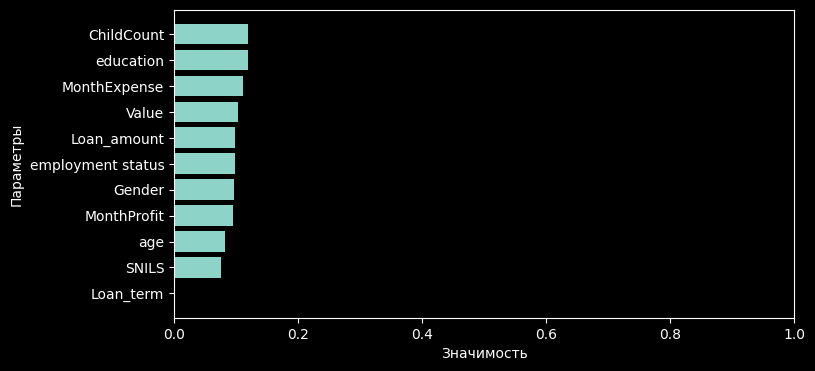

In [ ]:
feature_importance = xgb.feature_importances_

sorted = np.argsort(feature_importance)

ypos = np.arange(len(f_names))

fig= plt.figure(figsize=(8,4))
plt.barh(ypos, feature_importance[sorted])
plt.xlim([0,1])
plt.ylabel('Параметры')
plt.xlabel('Значимость')
plt.yticks(ypos,f_names[sorted] );

In [ ]:
results = xgb.evals_result()

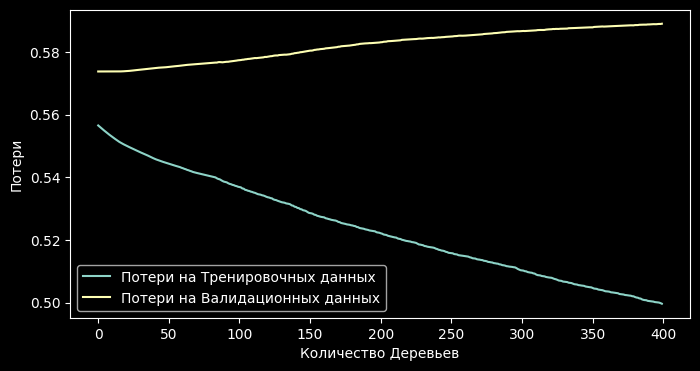

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(results["validation_0"]["logloss"], label="Потери на Тренировочных данных")
plt.plot(results["validation_1"]["logloss"], label="Потери на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Потери")
plt.legend()
plt.show()

In [ ]:
# решение видимо разваливается(

In [ ]:
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV    # кросс-валидация
from sklearn.model_selection import ShuffleSplit

import scipy.stats as stats

from sklearn.utils.fixes import loguniform

In [ ]:
C=75
kernel = 'rbf'
coef0=0.5
degree=5
gamma=0.95

SVC_clf=SVC(kernel=kernel,
            C=C,
            gamma=gamma,
            degree=degree,
            coef0 = coef0)

SVC_clf.fit(X_train, yA_train)

SVC(C=75, coef0=0.5, degree=5, gamma=0.95)

In [ ]:
y_predict=SVC_clf.predict(X_test)

print (classification_report(yA_test,
                             y_predict,
                             target_names=['success','denied']
                             ))

              precision    recall  f1-score   support

     success       0.23      0.22      0.22       311
      denied       0.76      0.77      0.76      1009

    accuracy                           0.64      1320
   macro avg       0.49      0.49      0.49      1320
weighted avg       0.64      0.64      0.64      1320



In [ ]:
# оптимизация гиперпараметров
C_range = loguniform(1e-1, 1e3)
gamma_range = loguniform(1e-2, 1e0)
C_range_poly = loguniform(1e-1, 1e2)
tuned_parameters = [{'kernel': ['rbf'],
                     'gamma': gamma_range,
                     'C': C_range},
                    {'kernel': ['poly'],
                     'degree': [2,3,4,5],
                     'C': C_range_poly}]


n_iter_search = 20
SVC_search = RandomizedSearchCV(estimator = SVC(coef0=0.5),
                                verbose = 3,
                                param_distributions=tuned_parameters,
                                cv=ShuffleSplit(n_splits=5, random_state=42),
                                n_iter = n_iter_search)

SVC_search.fit(X_train, yA_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=6.150744989235084, gamma=0.17316131763315987, kernel=rbf;, score=0.742 total time=   1.9s
[CV 2/5] END C=6.150744989235084, gamma=0.17316131763315987, kernel=rbf;, score=0.759 total time=   1.8s
[CV 3/5] END C=6.150744989235084, gamma=0.17316131763315987, kernel=rbf;, score=0.761 total time=   2.9s
[CV 4/5] END C=6.150744989235084, gamma=0.17316131763315987, kernel=rbf;, score=0.767 total time=   3.1s
[CV 5/5] END C=6.150744989235084, gamma=0.17316131763315987, kernel=rbf;, score=0.765 total time=   2.8s
[CV 1/5] END C=9.140600041604989, gamma=0.7476926779560645, kernel=rbf;, score=0.708 total time=   2.1s
[CV 2/5] END C=9.140600041604989, gamma=0.7476926779560645, kernel=rbf;, score=0.697 total time=   1.6s
[CV 3/5] END C=9.140600041604989, gamma=0.7476926779560645, kernel=rbf;, score=0.672 total time=   1.6s
[CV 4/5] END C=9.140600041604989, gamma=0.7476926779560645, kernel=rbf;, score=0.731 total time=   1.

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
                   estimator=SVC(coef0=0.5), n_iter=20,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ffa6c802a10>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ffa6c802500>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ffa6c8021a0>,
                                         'degree': [2, 3, 4, 5],
                                         'kernel': ['poly']}],
                   verbose=3)

In [ ]:
SVCbest=SVC_search.best_estimator_
SVCbest.fit(X_train, yA_train)

SVC(C=0.39537103004308294, coef0=0.5, gamma=0.0712345399514596)

In [ ]:
y_predict=SVCbest.predict(X_test) # SVCbest подставит

print (classification_report(yA_test,
                             y_predict,
                             target_names=['success','denied']
                             ))

              precision    recall  f1-score   support

     success       0.00      0.00      0.00       311
      denied       0.76      1.00      0.87      1009

    accuracy                           0.76      1320
   macro avg       0.38      0.50      0.43      1320
weighted avg       0.58      0.76      0.66      1320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(yA_test,y_predict).round(2)

0.76

In [ ]:
pd.DataFrame(yA_test).value_counts()

1    1009
0     311
dtype: int64

In [ ]:
# Метод опорных векторов и ансамбли показали схожий результат - всем кредит давать можно, но банк примерно 25% отказывает, однако
# почему такой результат я не знаю(

## Сохранение модели

In [ ]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(xgb)

## Тестирование модели

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   education          6599 non-null   int64 
 1   employment status  6599 non-null   int64 
 2   Value              6599 non-null   int64 
 3   MonthProfit        6599 non-null   int64 
 4   MonthExpense       6599 non-null   int64 
 5   Gender             6599 non-null   int64 
 6   ChildCount         6599 non-null   int64 
 7   SNILS              6599 non-null   int64 
 8   BankA_decision     6599 non-null   int64 
 9   BankB_decision     6599 non-null   int64 
 10  BankC_decision     6599 non-null   int64 
 11  BankD_decision     6599 non-null   int64 
 12  BankE_decision     6599 non-null   int64 
 13  Loan_amount        6599 non-null   int64 
 14  Loan_term          6599 non-null   int64 
 15  age                6599 non-null   int64 
 16  position           6599 non-null   object


In [ ]:
test_client = df.loc[[545]] # для примера взял клиента N...,
                            # модель кушает данные только в текущем формате/порядке
test_client

,education,employment status,Value,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Loan_amount,Loan_term,age,position,goods_category,family status
545,1,2,11,300000,50000,0,0,0,0,1,1,1,1,74000,12,30,директор,Fitness,Никогда в браке не состоял(а)


In [ ]:
# X_train.loc[[659]]
# pd.DataFrame(X_train.loc[659])

In [ ]:
test_client = preprocessors.transform(test_client)

In [ ]:
test_client

array([[ 0.41637947,  1.69906473,  0.81210866,  2.30081258,  1.94788076,
        -0.66450131, -0.23653753, -0.7403336 , -0.04992637, -0.02703697,
        -0.50758139]])

In [ ]:
# Load the pickled model
model_from_pickle = pickle.loads(saved_model)

In [ ]:
# Use the loaded pickled model to make predictions
test_predict = model_from_pickle.predict(test_client)
test_predict

array([1])

In [ ]:
round(model_from_pickle.score(test_client,test_predict), 4)

1.0

In [ ]:
# моя модель предсказывает, что кредит дадут с вероятностью 100% :)